In [4]:
#install packages if not installed already
%pip install pandas datetime numpy matplotlib yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
#import libraries
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import yfinance as yf

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


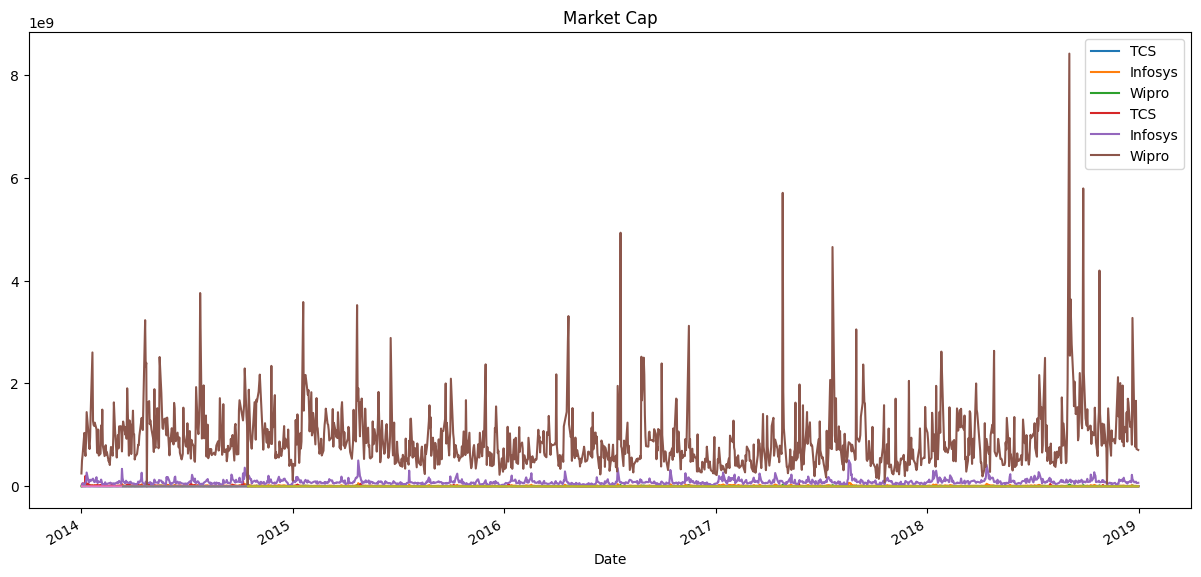

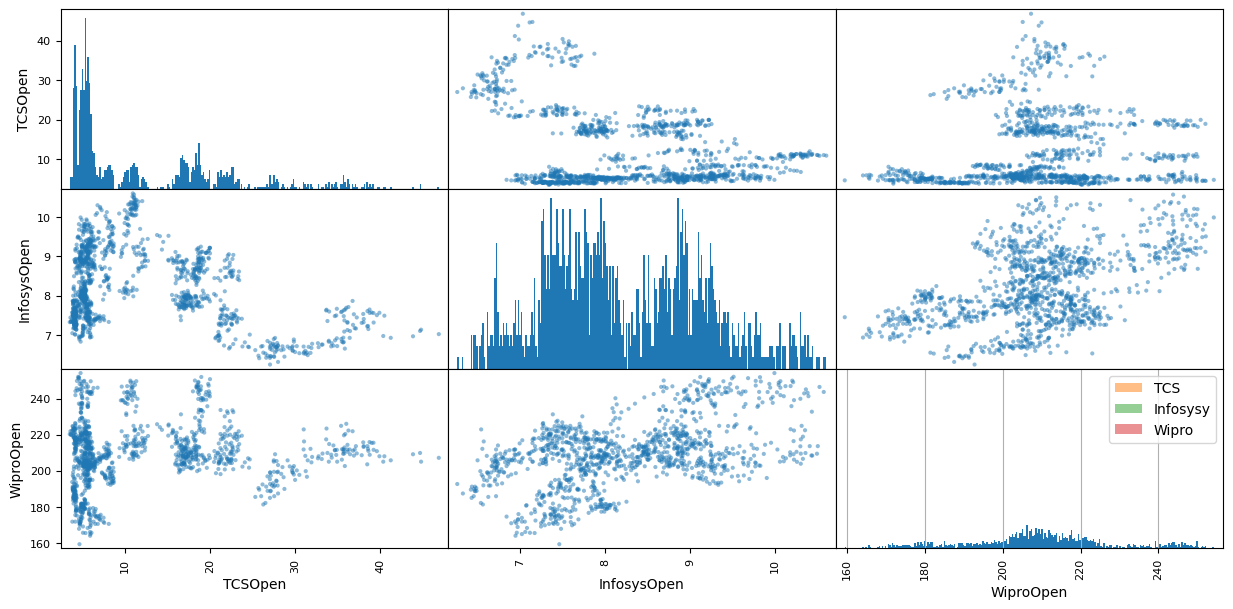

In [6]:
#try some of the features
start = "2014-01-01"
end = '2019-1-01'
tcs = yf.download('TCS',start,end)
infy = yf.download('INFY',start,end)
wipro = yf.download('WIPRO.NS',start,end)

tcs['Volume'].plot(label = 'TCS', figsize = (15,7))
infy['Volume'].plot(label = "Infosys")
wipro['Volume'].plot(label = 'Wipro')
plt.title('Volume of Stock traded')
plt.legend()

#Market Capitalisation
tcs['MarktCap'] = tcs['Open'] * tcs['Volume']
infy['MarktCap'] = infy['Open'] * infy['Volume']
wipro['MarktCap'] = wipro['Open'] * wipro['Volume']
tcs['MarktCap'].plot(label = 'TCS', figsize = (15,7))
infy['MarktCap'].plot(label = 'Infosys')
wipro['MarktCap'].plot(label = 'Wipro')
plt.title('Market Cap')
plt.legend()

tcs['MA50'] = tcs['Open'].rolling(50).mean()
tcs['MA200'] = tcs['Open'].rolling(200).mean()
tcs['Open'].plot(figsize = (15,7))
tcs['MA50'].plot()
tcs['MA200'].plot()

data = pd.concat([tcs['Open'],infy['Open'],wipro['Open']],axis = 1)
data.columns = ['TCSOpen','InfosysOpen','WiproOpen']
scatter_matrix(data, figsize = (8,8), hist_kwds= {'bins':250})

#Volatility
tcs['returns'] = (tcs['Close']/tcs['Close'].shift(1)) -1
infy['returns'] = (infy['Close']/infy['Close'].shift(1))-1
wipro['returns'] = (wipro['Close']/wipro['Close'].shift(1)) - 1
tcs['returns'].hist(bins = 100, label = 'TCS', alpha = 0.5, figsize = (15,7))
infy['returns'].hist(bins = 100, label = 'Infosysy', alpha = 0.5)
wipro['returns'].hist(bins = 100, label = 'Wipro', alpha = 0.5)
plt.legend()